Logistic Regression for Binnary Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#create dataset
from sklearn.datasets import make_classification
x,y = make_classification(n_samples = 1000,n_features = 10, n_classes = 2,random_state = 42)

In [3]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [4]:
#training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

In [5]:
#Model Training
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
y_pred = logistic.predict(x_test)

In [6]:
#performance metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy : 0.8466666666666667
[[118  17]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [7]:
#Hyperparameter Tunning and Cross-Validation
#gridsearchcv and randomizedsearchcv
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
params = dict(penalty = penalty , C = c_values , solver = solver)
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model,param_grid = params,scoring = 'accuracy',cv=cv, n_jobs=-1)
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [8]:
grid.fit(x_train,y_train)
grid.best_params_
grid.best_score_
y_pred = grid.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy : 0.8533333333333334
[[124  11]
 [ 33 132]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise Va

In [9]:
randomcv = RandomizedSearchCV(estimator = model,param_distributions = params,scoring = 'accuracy',cv=5, n_jobs=-1)
randomcv

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [10]:
randomcv.fit(x_train,y_train)
randomcv.best_params_
randomcv.best_score_
y_pred = randomcv.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy : 0.8533333333333334
[[120  15]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       135
           1       0.90      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise Value

Logistic Regression For Multi-Class classification - OVR(one verses rest)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
#create dataset
from sklearn.datasets import make_classification
x,y = make_classification(n_samples = 1000,n_features = 10, n_classes = 3,n_informative = 3,random_state = 42)

In [13]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,0.771533,-1.474336,2.196646,-0.678992,0.767479,-1.226179,-0.237566,0.681743,1.089962,0.962503
1,1.858383,-3.680880,0.227496,-3.818368,0.635968,1.609521,-0.153135,-0.474178,1.341139,-0.771772
2,-0.987248,1.539168,0.585904,1.185281,-0.736770,-1.406815,0.684783,-0.322028,-1.451034,1.325432
3,-1.022420,1.381787,2.015275,0.861434,1.290644,-1.889649,1.009138,0.363116,-1.844238,0.311110
4,-0.131161,-2.079008,1.483744,1.636858,-0.734811,-0.640154,2.666422,-1.085748,-0.892851,0.029796
...,...,...,...,...,...,...,...,...,...,...
995,0.982677,-1.908917,-0.385673,-2.565989,0.434503,-1.334611,-0.060318,1.040062,0.433730,-0.739771
996,-1.144949,1.434090,-0.459657,0.358606,-1.079842,0.918915,1.339638,1.193113,-2.473007,1.021515
997,-1.227082,1.656028,0.472630,1.718125,-1.366858,0.018017,1.131626,-0.863494,-1.839323,-0.031203
998,1.285276,-0.297152,-0.671721,-1.843337,-1.254161,-0.276889,-2.913304,-1.315441,2.854465,1.309444


In [14]:
#training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

In [15]:
#Model Training
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class = 'ovr')
logistic.fit(x_train,y_train)
y_pred = logistic.predict(x_test)

In [16]:
#performance metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy : 0.68
[[79 16  8]
 [31 38 27]
 [ 3 11 87]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       103
           1       0.58      0.40      0.47        96
           2       0.71      0.86      0.78       101

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.67      0.68      0.66       300



Logistic Regression with Imbalanced Dataset

In [17]:
from collections import Counter
from sklearn.datasets import make_classification

In [18]:
#imbalanced Dataset
x,y = make_classification(n_samples = 1000, n_features= 10, n_clusters_per_class =1,n_redundant=0,weights=[0.99],random_state= 1)

In [19]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,-0.472694,1.640613,1.911704,-1.398943,0.633441,-0.519450,-0.095361,-0.116182,-0.107378,-0.367900
1,-1.314767,0.332999,0.699960,0.110209,1.002414,-0.673287,-0.741126,-0.498919,1.434897,-1.622041
2,0.860771,1.408443,0.642810,0.626974,0.422287,-0.643640,-0.615694,0.561775,-1.555137,1.468860
3,-1.038170,0.848871,1.211450,1.816778,-0.858449,-0.802652,0.076341,1.891287,1.282932,-0.369103
4,-0.826925,-0.192513,-0.026046,0.960666,0.114438,0.275673,0.787996,3.298541,-1.579064,0.531882
...,...,...,...,...,...,...,...,...,...,...
995,0.508945,1.720125,1.531775,0.538265,-0.678348,-0.777175,0.599902,0.374534,0.994435,-1.321513
996,0.699833,1.798451,2.008247,0.212831,0.534143,-0.442637,-1.751113,-1.443121,0.680654,-1.036174
997,-0.009382,0.712759,0.316065,0.333570,-0.353857,-0.835902,-0.083557,-1.005436,0.125835,-0.754563
998,0.805837,1.113462,-0.047018,-2.146003,0.205579,0.326200,1.824712,-1.140396,0.687974,0.762861


In [20]:
Counter(y)

Counter({0: 984, 1: 16})

<Axes: xlabel='0', ylabel='1'>

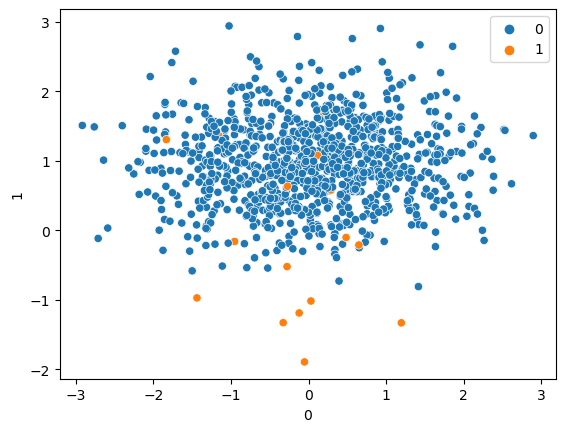

In [21]:
sns.scatterplot(x = pd.DataFrame(x)[0],y =pd.DataFrame(x)[1],hue=y)

In [22]:
#training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

In [23]:
#Model Training
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
params = dict(penalty = penalty , C = c_values , solver = solver,class_weight = class_weight)
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model,param_grid = params,scoring = 'accuracy',cv=cv, n_jobs=-1)
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [24]:
grid.fit(x_train,y_train)
grid.best_params_
grid.best_score_
y_pred = grid.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4000 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise

Accuracy : 0.9866666666666667
[[296   0]
 [  4   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       296
           1       0.00      0.00      0.00         4

    accuracy                           0.99       300
   macro avg       0.49      0.50      0.50       300
weighted avg       0.97      0.99      0.98       300



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
randomcv = RandomizedSearchCV(estimator = model,param_distributions = params,scoring = 'accuracy',cv=5, n_jobs=-1)
randomcv

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 10},
                                                         {0: 1, 1: 50},
                                                         {0: 1, 1: 100},
                                                         {0: 10, 1: 1},
                                                         {0: 10, 1: 10},
                                                         {0: 10, 1: 50},
                                                         {0: 10, 1: 100},
                                                         {0: 50, 1: 1},
                                                         {0: 50, 1: 10},
                                                         {0: 50, 1: 50},
                                                         {0: 50, 1: 100},
                                                         {0: 100, 1: 1},
                                                         {0: 100, 1: 10},
                                                         {0: 100, 1: 50},
                                                         {0: 100, 1: 100}],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [26]:
randomcv.fit(x_train,y_train)
randomcv.best_params_
randomcv.best_score_
y_pred = randomcv.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy : 0.9866666666666667
[[296   0]
 [  4   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       296
           1       0.00      0.00      0.00         4

    accuracy                           0.99       300
   macro avg       0.49      0.50      0.50       300
weighted avg       0.97      0.99      0.98       300



D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise Value

Logistic Regression ROC curve

In [27]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib import pyplot

In [28]:
x,y = make_classification(n_samples = 1000,n_features = 10, n_classes = 2,random_state = 42)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

In [30]:
dummy_model_prob = [ 0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [31]:
model = LogisticRegression()
model.fit(x_train,y_train)
model_prob = model.predict_proba(x_test)
model_prob = model_prob[:,1]

In [32]:
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9226936026936027


In [33]:
#calculate ROC curve
dummy_fpr,dummy_tpr,_ = roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,thresholds = roc_curve(y_test,model_prob)

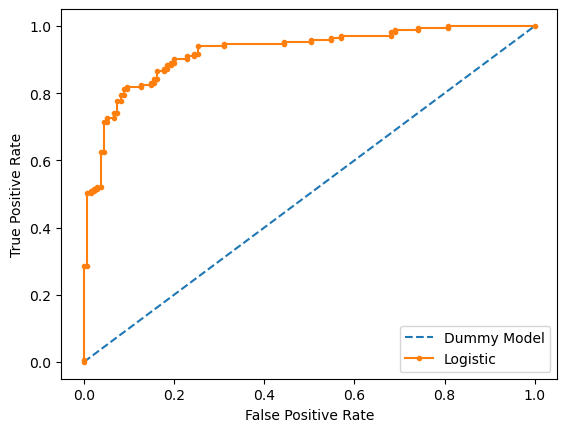

In [34]:
#plot ROC curve
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label = 'Dummy Model')
pyplot.plot(model_fpr,model_tpr,marker='.',label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

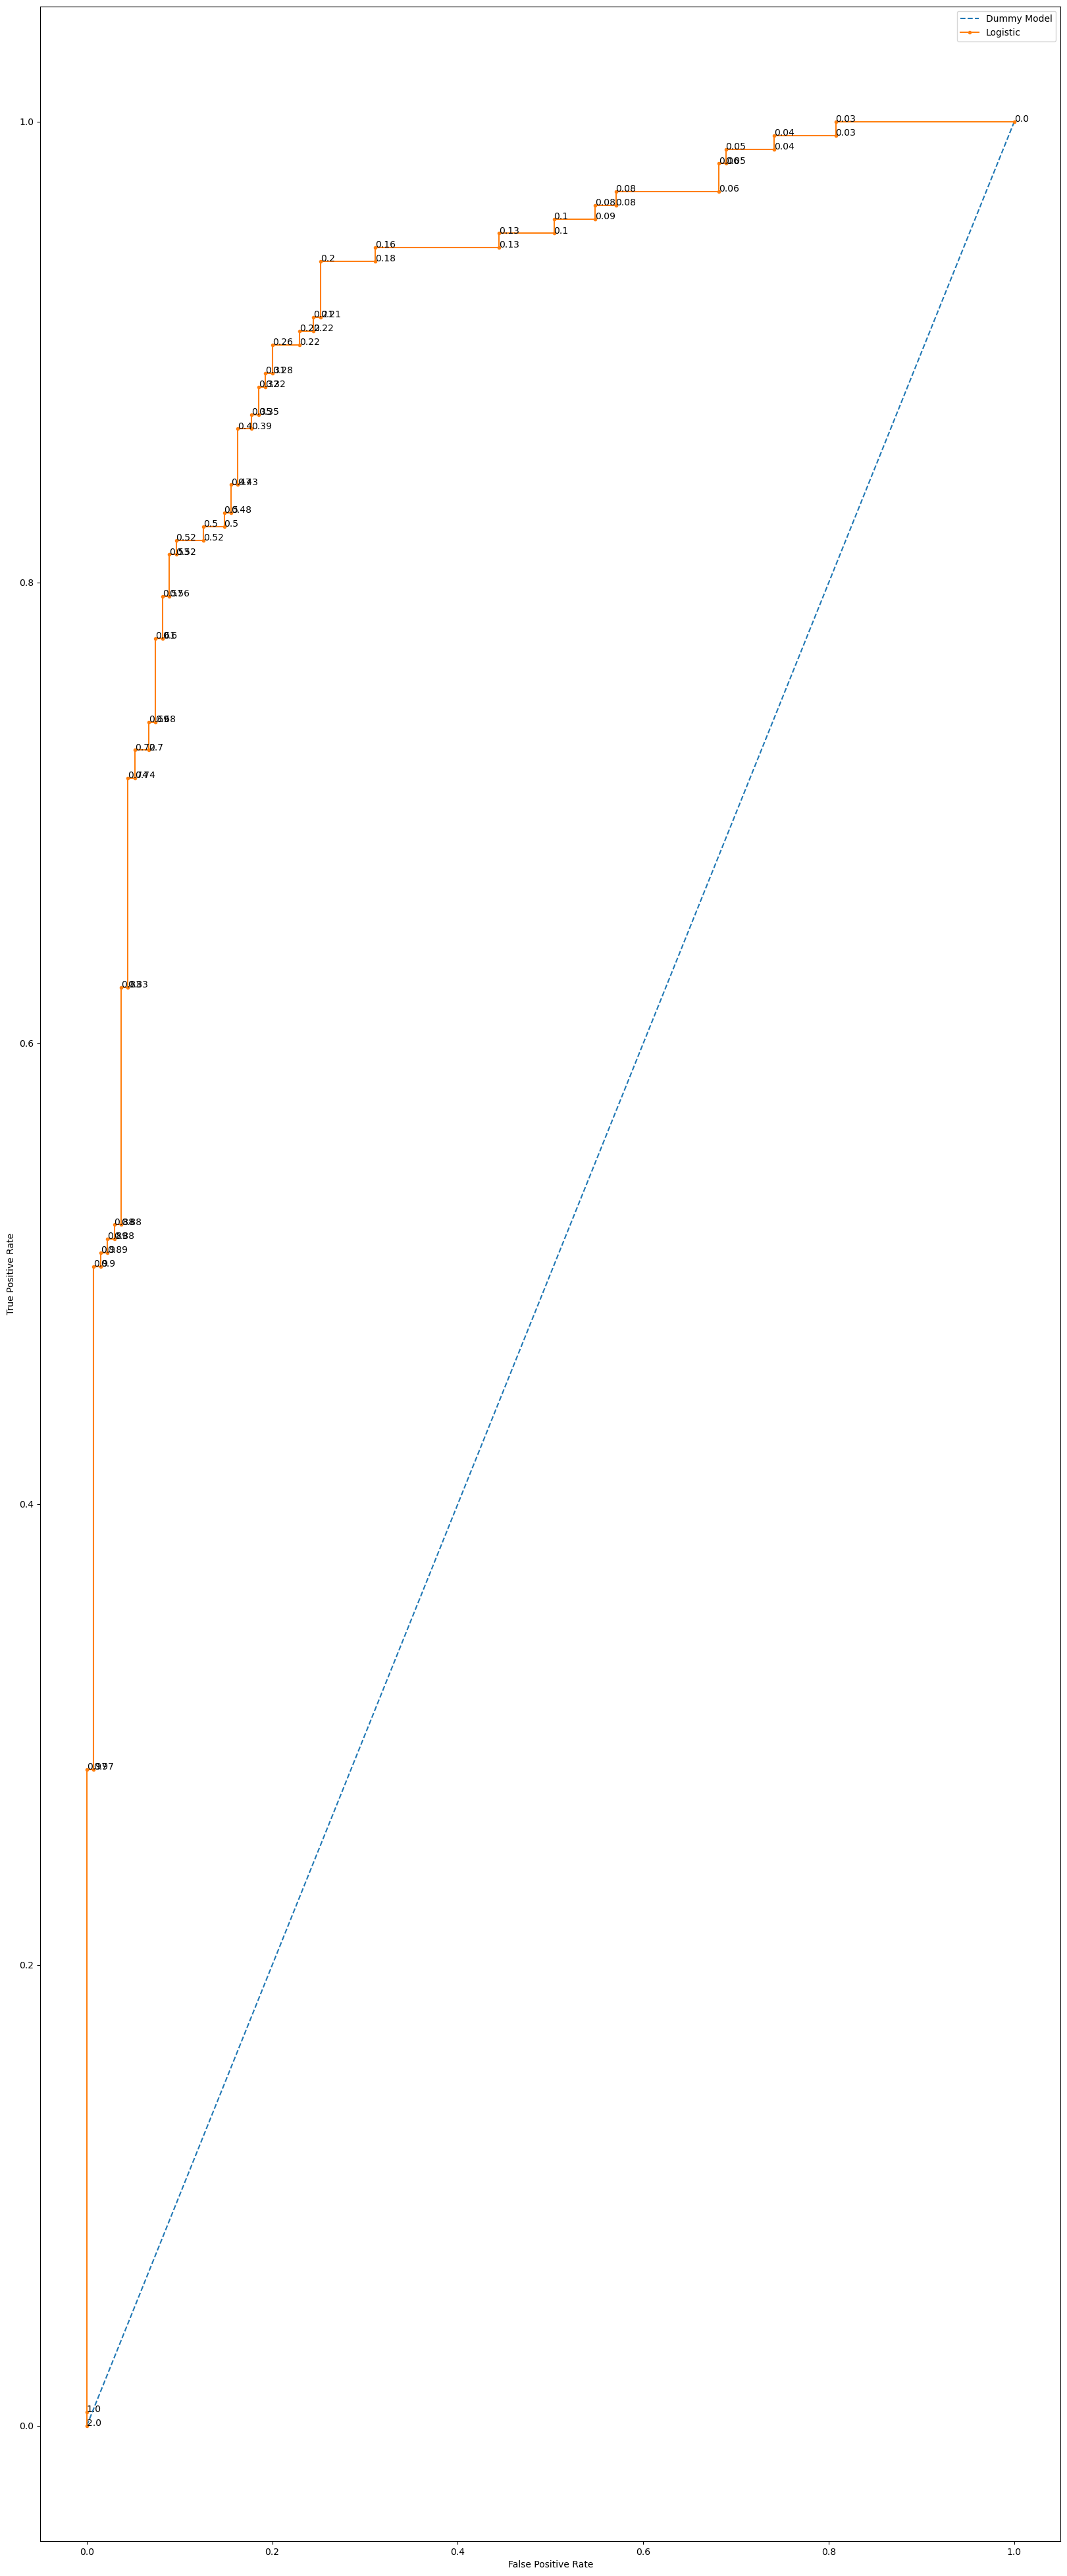

In [35]:
import numpy as np 
fig , ax = pyplot.subplots(figsize=(20,50))
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label = 'Dummy Model')
pyplot.plot(model_fpr,model_tpr,marker='.',label='Logistic')
for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate('%s'%np.round(xyz[2],2),xy = (xyz[0],xyz[1]))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()